# Top-Tier Skill Demand in Leading Data Roles

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

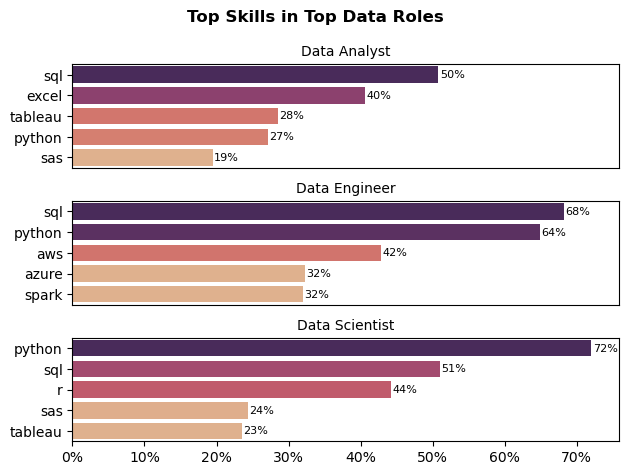

In [ ]:
# Filter by the United States and convert job_skills column values from a list to individual ones.
df_US = df[df["job_country"] == "United States"].copy()
df_skills = df_US.explode("job_skills")

# Data frame with data roles and their job skills
df_job_title_count = df_US["job_title_short"].value_counts().reset_index(name="jobs_total")
df_skills_count = df_skills.groupby(["job_title_short", "job_skills"]).size().reset_index(name="skill_count").sort_values("skill_count", ascending=False)
# Create a new DataFrame for upcoming calculations and merge it with the previous one
df_skills_per = pd.merge(df_skills_count, df_job_title_count, how="left", on="job_title_short")
df_skills_per["skill_percentage"] = ( df_skills_per["skill_count"] / df_skills_per["jobs_total"] ) * 100

#Plotting
top_title = df_skills_count["job_title_short"].unique().tolist()
top_title = sorted(top_title[:3])
fig, ax = plt.subplots(len(top_title), 1)
for i, job_title in enumerate(top_title):
    df_plot = df_skills_per[df_skills_per["job_title_short"] == job_title].head()
    sns.barplot(ax=ax[i], data=df_plot, x="skill_percentage", y="job_skills", hue="skill_percentage", palette="flare", legend=False)
    ax[i].set_title(job_title, fontsize=10), ax[i].set_xlabel(""), ax[i].set_ylabel(""), ax[i].set_xlim(0, df_skills_per["skill_percentage"].max())
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x)}%"))
    for container in ax[i].containers:
        ax[i].bar_label(container, fmt='%d%%', fontsize=8, color='black', padding=1)
    if i != len(top_title) - 1:
        ax[i].set_xticks([])
plt.suptitle("Top Skills in Top Data Roles", weight="bold")
fig.tight_layout(h_pad=1)
plt.show()